## **Trabajo Práctico Individual n° 1: Exploratory Data Analysis**
____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Ciencia de Datos - Curso I5521__
____

- Nombre: Tomas 
- Apellido: Neustadt
- Legajo: 164.564-0

En este trabajo práctico aplicaremos algunas técnicas aprendidas para el análisis exploratorio de datos.

Este conjunto de datos procede del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente tiene o no diabetes, basándose en determinadas mediciones diagnósticas incluidas en el conjunto de datos. La selección de estas instancias de una base de datos más amplia está sujeta a varias restricciones como por ejemplo se trata de pacientes mujeres. 

Los conjuntos de datos constan de varias variables médicas predictoras y una variable objetivo, el resultado. Las variables predictoras incluyen el número de embarazos que ha tenido la paciente, su IMC, su nivel de insulina, su edad, etc.

#### Variables:
- Pregnancies: Número de embarazos
- Glucose: Concentración de glucosa en plasma a las 2 horas en una prueba de tolerancia a la glucosa oral
- BloodPressure: Presión arterial diastólica (mm Hg)
- SkinThickness: Espesor del pliegue cutáneo del tríceps (mm)
- Insulin: Insulina sérica de 2 horas (mu U/ml)
- BMI: Índice de masa corporal (peso en kg/(altura en m)^2)
- DiabetesPedigreeFunction: Función del pedigrí de la diabetes
- Age: Edad (años)
- Outcome: Variable de clase (0 o 1) 1 para personas diabéticas, 0 para las que no lo son.

## **Objetivos del trabajo practico**
- resolver los requisitos que se detallan en las proximas celdas
- dejar comentarios # en cada linea de codigo que se agregue
- fecha limite de entrega: 28 de Septiembre 2022 a las 23h59

In [1]:
## Importo librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### **Objetivo 1**
Lo primero que deberan hacer será importar
- el dataset
- corroborar que lo hayamos cargado correctamente.

Primero visualizare la ruta de la carpeta con el dataset con el comando pwd

In [2]:
pwd

'/Users/tneustadt/Documents/Ciencia-de-Datos/tp-1'

In [3]:
ls

ClusterAI_TP1_EDA_tomas_neustadt.ipynb  ClusterAI_TP_dataset_diabetes.csv


In [4]:

diabetes = pd.read_csv('ClusterAI_TP_dataset_diabetes.csv', delimiter=',', encoding='latin-1')


In [5]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### **Objetivo 2**
Ahora imprimir también las dimensiones del dataset

In [6]:
np.shape(diabetes)

(768, 9)

##### **Objetivo 3**
Mostrar los nombres de cada columna, el tipo de dato que contiene cada una de ellas y la cantidad de nulos presentes.

In [7]:
# PISTA: con una sola línea de código podríamos obtener toda esta información
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##### **Objetivo 4**
Mostrar como se distribuye la variable "Outcome".

In [8]:
outcome_1 = diabetes.loc[diabetes['Outcome'] == 1]

print("Los valores de Outcome iguales a 1 representan " + str(np.round(np.shape(outcome_1)[0]/np.shape(diabetes)[0],2)) +
      " de los registros totales y los valores iguales a 0 representan  " +  
      str(1-(np.round(np.shape(outcome_1)[0]/np.shape(diabetes)[0],2))) + " de los registros totales")

Los valores de Outcome iguales a 1 representan 0.35 de los registros totales y los valores iguales a 0 representan  0.65 de los registros totales


##### **Objetivo 5**
Obtener algunas métricas estadísticas de todas las variables numéricas del dataset por ejemplo, media, maximo, minimo, desvio estandar entre otros. 

In [9]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### **Objetivo 6**
Imprimir un pairplot del dataframe en función de la variable "Outcome". Podemos sacar alguna rápida conclusión de lo observado? Cuál?

In [10]:
feature = ['Outcome']
x = diabetes.loc [:,feature]

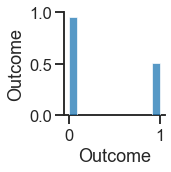

In [11]:
sns.set_style("white")
sns.set_context("talk")
sns.set_style("ticks")
sns.pairplot(x)
plt.show()

Hay el doble de personas no diabeticas que diabeticas

##### **Objetivo 7**

Analizar la correlación lineal de las variables.

- Cuales son los dos pares de variables más correlaciondas? 
- Que valor y tipo de correlación tienen?
- Podríamos tomar alguna decisión con respecto a esto? Cuál?

In [12]:
diabetes_corr = diabetes.corr()

In [13]:
diabetes_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


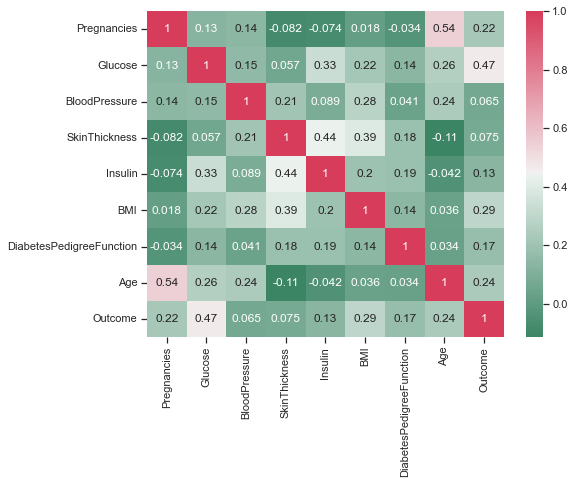

In [14]:
sns.set_theme(style="ticks")
corrmat = diabetes.corr()
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(corrmat, annot=True, cmap=sns.diverging_palette(150, 5, as_cmap=True))

Los dos pares de variables con mayor correlación: </br>
1. Pregnancies y Age con un R = 0.54
2. Glucose y Outcome con un R = 0.47

Tanto como en el par de variables 1 y 2, el rango de R es mayor a 0 y menor a 1 se trata de una correlacion de tipo positiva.

Con respecto a Pregnancies y Age se puede sacar la conclusion quea mayor edad hay un mayor numero de embarazos.
Con respecto a Glucose y Outcome, se puede sacar la conclusion que los diabeticos tienen mayor glucosa en sangre.

##### **Objetivo 8**
Hacer un histograma de la variable BMI

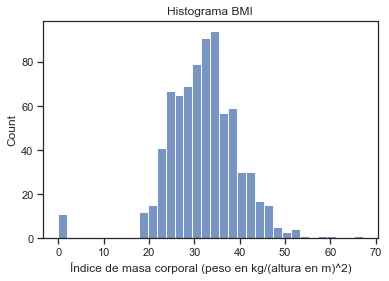

In [15]:
sns.histplot(data=diabetes, x="BMI", stat="count", edgecolor=None)
plt.title('Histograma BMI')
plt.xlabel('Índice de masa corporal (peso en kg/(altura en m)^2)')
plt.show()

##### **Objetivo 9**
Se pueden ver algun valor extrano en la distribución de la variable BMI?
Realizar un boxplot para corroborar esto.

Si, se puede ver un valor extrano en la distribucion de la variable BMI.

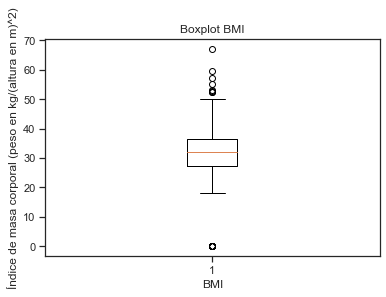

In [16]:
plt.boxplot(diabetes.BMI)
plt.title('Boxplot BMI')
plt.ylabel('Índice de masa corporal (peso en kg/(altura en m)^2)')
plt.xlabel('BMI')
plt.show()

##### **Objetivo 10**
Filtrar el dataset para eliminar los valores que consideremos atípicos de la variable BMI.

In [17]:
percentil_sup = 0.99
percentil_inf = 0.02

limite_sup = diabetes['BMI'].quantile(percentil_sup)
limite_inf = diabetes['BMI'].quantile(percentil_inf)

print('El limite superior es: ' + str(limite_sup))
print('El limite inferior es: ' + str(limite_inf))

El limite superior es: 50.75900000000009
El limite inferior es: 19.168000000000003


In [18]:
diabetes_filtrado = diabetes[(diabetes["BMI"] <limite_sup) & (diabetes["BMI"] > limite_inf)]

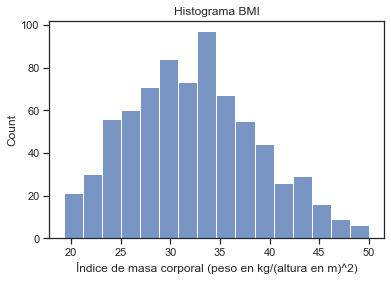

In [19]:
sns.histplot(data=diabetes_filtrado, x="BMI", stat="count", edgecolor=None)
sns.set_theme(style="ticks")
plt.title('Histograma BMI')
plt.xlabel('Índice de masa corporal (peso en kg/(altura en m)^2)')
plt.show()

##### **Objetivo 11**

Hacer un boxplot de la distribución de la "Glucosa" segun el tipo de paciente de la variable "Outcome". Es decir que hay que visualizar un boxplot de la variable "Glucosa" por cada categoria de la variable "Outcome".

Que podemos observar?

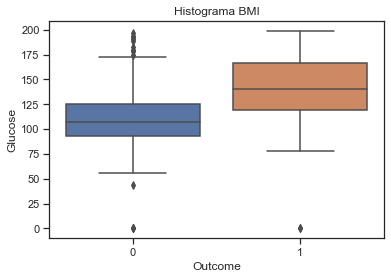

In [20]:
sns.set_theme(style="ticks")
sns.boxplot(x="Outcome", y="Glucose", data=diabetes_filtrado)
plt.title('Histograma BMI')
plt.show()

Existe una correlación entre Glucosa y Outcome, las personas con alto nivel de Glucosa van a tener diabetes. En el boxplot se ven muchos casos anormales, por lo que existe la posibilidad de que tengan alto nivel de glucosa y no diabetes.

##### **Objetivo 12**
Hacer un Scatterplot donde se muestre como se distribuye la Glucosa y la Presión sanguínea según el tipo de paciente.

Se puede ver alguna relación? Cuál?

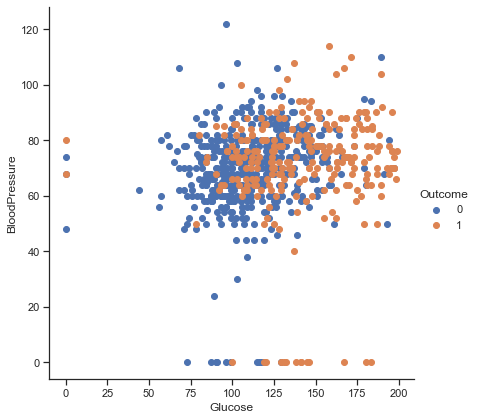

In [21]:
sns.set_theme(style="ticks")
sns.FacetGrid(diabetes_filtrado, hue="Outcome", height=6).map(plt.scatter, "Glucose", "BloodPressure").add_legend()
plt.show()

Existe una correlación entre un alto nivel de glucosa y diabetes, aunque las dos muestras estan muy superpuestas por lo que pueden haber casos en los que no tenga glucosa alta y tenga diabetes, o tenga diabetes y no tenga glucosa alta. Las dos muestras están muy superpuestas por lo que si queremos clasificar las mismas para hacer predicciónes, tendriamos muchos errores.

##### **Objetivo 13**
Crear una nueva variable de rangos de edades de tipo texto/ string dividiendolo de la siguiente manera:

- Primer rango de edad menor a 30 años
- Segundo rango de edad entre 30 y 40 años.
- Tercer rango de edad mayor a 40 años

In [25]:
diabetes_filtrado.loc[(diabetes_filtrado['Age'] < 30), 'Rango_de_edad'] = 'Menor a 30 años'
diabetes_filtrado.loc[(diabetes_filtrado['Age'] > 30) & (diabetes_filtrado['Age'] < 40), 'Rango_de_edad'] = "Entre 30 y 40 años"
diabetes_filtrado.loc[(diabetes_filtrado['Age'] > 40), 'Rango_de_edad'] = 'Mayor a 40 años'

In [23]:
diabetes_filtrado.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Rango_de_edad
0,6,148,72,35,0,33.6,0.627,50,1,Mayor a 40 años
1,1,85,66,29,0,26.6,0.351,31,0,Entre 30 y 40 años
2,8,183,64,0,0,23.3,0.672,32,1,Entre 30 y 40 años
3,1,89,66,23,94,28.1,0.167,21,0,Menor a 30 años
4,0,137,40,35,168,43.1,2.288,33,1,Entre 30 y 40 años


##### **Objetivo 14**
Hacer un count plot que cuente la cantidad de pacientes diabéticos y no diabéticos por rango etario.

Podemos extraer alguna conclusión al respecto? Cuál?

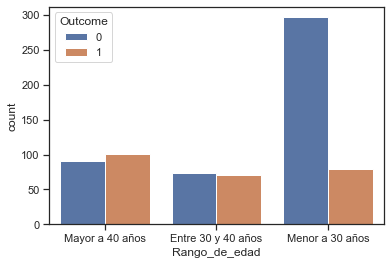

In [24]:
sns.set_theme(style="ticks")
sns.countplot(data=diabetes_filtrado, x="Rango_de_edad", hue="Outcome")
plt.show()

1. Para el rango menor a 30 años, se puede ver una clara diferente entre las personas con Diabetes y las personas que no tienen diabetes, siendo mucho la cantidad de personas que no tienen diabetes.

2 y 3. Para las personas de 30 años a 40 años y mayores a 40 años, la cantidad de personas con diabetes y sin diabetes es la misma.